In [1]:
from deficrawler import Oracle
from deficrawler import Dex
from deficrawler import Lending
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from collections import Counter

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

pd.set_option('display.max_columns', 500)


In [2]:
# Lending protocols
aave = Lending(protocol="Aave", chain="Ethereum", version=2)
aave_polygon = Lending(protocol="Aave", chain="Polygon", version=2)
compound = Lending(protocol="Compound", chain="Ethereum", version=2)
cream = Lending(protocol="Cream", chain="Ethereum", version=2)
cream_bsc = Lending(protocol="Cream", chain="bsc", version=2)


# Supported entities for aave
print(aave.supported_entities())

['borrow', 'deposit', 'liquidation', 'repay']


In [3]:
# Get borrows in a time period
start_date = '01/10/2022 00:00:01'
end_date = '04/12/2022 23:59:59'


list_borrows = [*aave.get_data_from_date_range(start_date, end_date, "borrow"),
                *aave_polygon.get_data_from_date_range(start_date, end_date, "borrow"),
                *compound.get_data_from_date_range(start_date, end_date, "borrow"),
                *cream_bsc.get_data_from_date_range(start_date, end_date, "borrow"),
                *cream.get_data_from_date_range(start_date, end_date, "borrow")]



df_borrows = pd.DataFrame.from_records(list_borrows)
df_borrows.head()


,tx_id,protocol,chain,version,user,token,amount,timestamp
0,15649016,Aave,Ethereum,2,0xce74a5886ea7a8a675d8fb5fc11a697a23fe1dc8,BUSD,50000.0,1664575427
1,15649088,Aave,Ethereum,2,0x66b0d6cd3a7704baeeb42a78122311949ac3b743,USDT,400.0,1664576291
2,15649110,Aave,Ethereum,2,0x1b7a9c831b4f2088fa6eae337088ae2fc9913ef5,USDC,100.0,1664576555
3,15649115,Aave,Ethereum,2,0x164e9765e50495b0a19770682cb30d442bda9c64,USDC,2000.0,1664576615
4,15649304,Aave,Ethereum,2,0xd54e6e49c1dd1e99b70f26153fb28383b434823e,USDC,500.0,1664578919


In [4]:
df_borrows.shape

(63849, 8)

In [5]:
df_borrows.protocol.unique()

array(['Aave', 'Compound', 'Cream'], dtype=object)

In [6]:
df_borrows['time_dt'] = pd.to_datetime(df_borrows['timestamp'],unit='s')
df_borrows['month'] = df_borrows.time_dt.dt.month
df_borrows.head(3)

,tx_id,protocol,chain,version,user,token,amount,timestamp,time_dt,month
0,15649016,Aave,Ethereum,2,0xce74a5886ea7a8a675d8fb5fc11a697a23fe1dc8,BUSD,50000.0,1664575427,2022-09-30 22:03:47,9
1,15649088,Aave,Ethereum,2,0x66b0d6cd3a7704baeeb42a78122311949ac3b743,USDT,400.0,1664576291,2022-09-30 22:18:11,9
2,15649110,Aave,Ethereum,2,0x1b7a9c831b4f2088fa6eae337088ae2fc9913ef5,USDC,100.0,1664576555,2022-09-30 22:22:35,9


<AxesSubplot:xlabel='month', ylabel='count'>

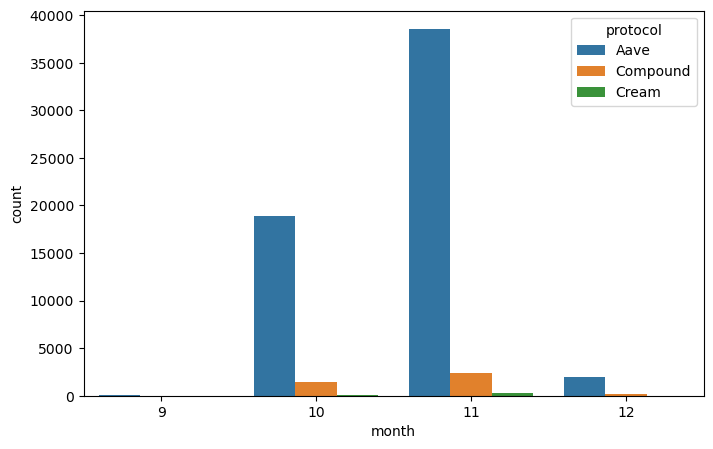

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'month', hue="protocol", data =df_borrows, )

<AxesSubplot:xlabel='month', ylabel='count'>

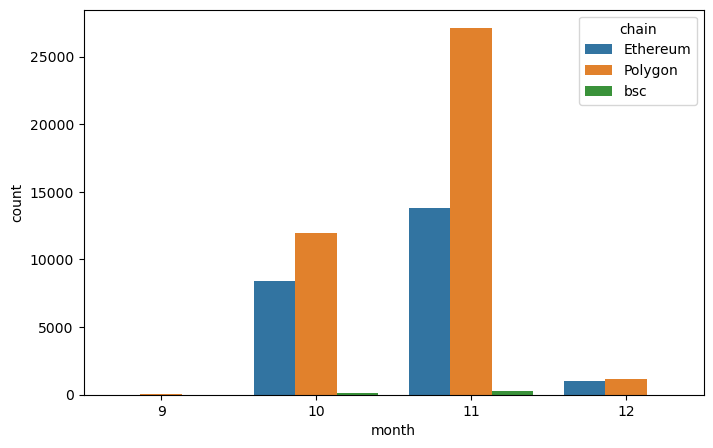

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'month', hue="chain", data =df_borrows, )

<AxesSubplot:xlabel='month', ylabel='count'>

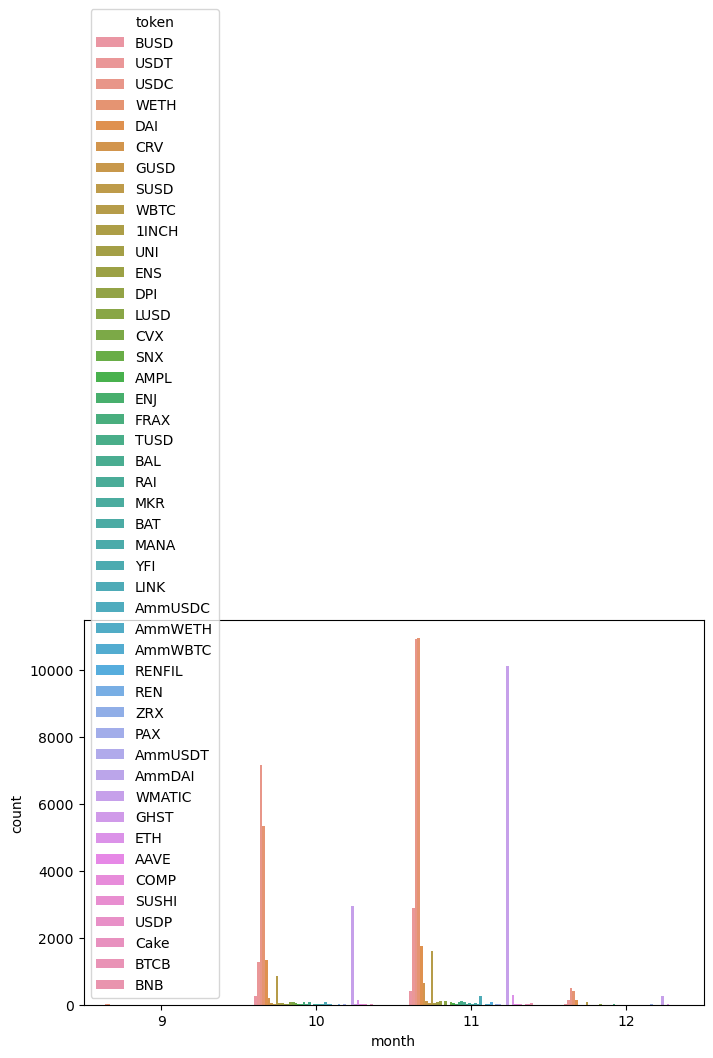

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'month', hue="token", data =df_borrows, )

In [34]:
t_count =pd.DataFrame(df_borrows.groupby(['token'])['token'].count())
t_count.rename(columns = {'token':'count'}, inplace = True)
t_count['token'] = t_count.index

In [40]:
?palettable.colorbrewer

Object `palettable.colorbrewer` not found.


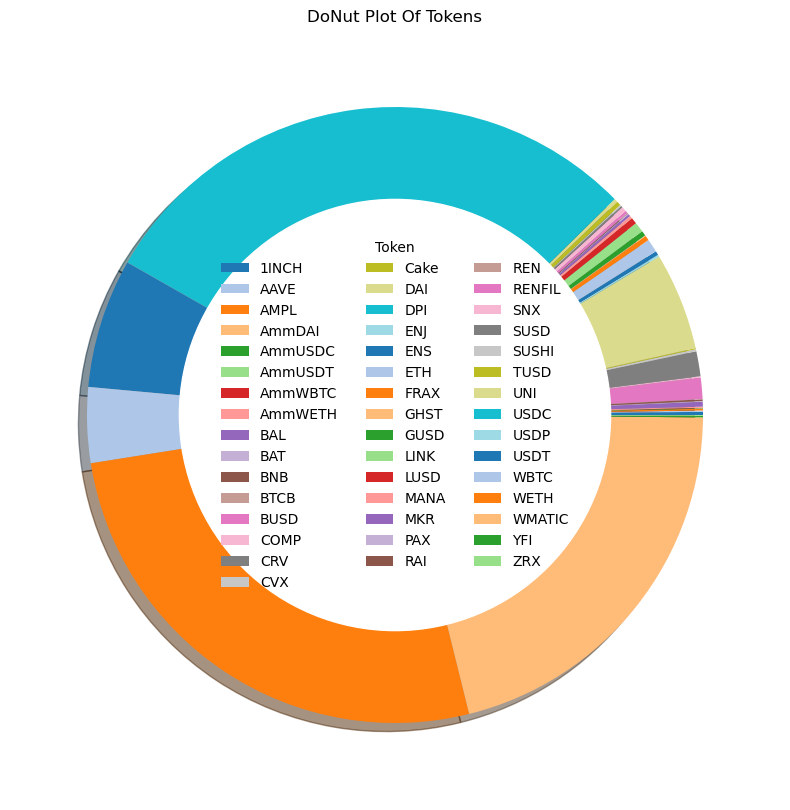

In [45]:

from palettable.tableau import Tableau_20
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(t_count['count'], labels=t_count.token, labeldistance=None, 
    colors=Tableau_20.hex_colors,shadow=True, radius=1)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(title="Token", loc="center", ncol=3, frameon=False)
plt.title('DoNut Plot Of Tokens')
plt.show()

In [38]:
fig = px.treemap(t_count, path=['token'], values='count',title='Tree Of Token')
fig.show()

In [13]:
# AMM protocols
uniswap = Dex(protocol="Uniswap", chain="Ethereum", version=2)
balancer = Dex(protocol="Balancer", chain="Ethereum", version=1)
bancor = Dex("Bancor", chain="Ethereum", version=1)
shushi = Dex("SushiSwap", chain="Ethereum", version=1)

In [14]:
uniswap.supported_entities()

['swap', 'pool']

In [23]:
# Get all the swaps in a time range
start_date_amm = '03/12/2022 00:00:00'
end_date_amm = '03/12/2022 23:59:59'

list_swaps = [*uniswap.get_data_from_date_range(start_date_amm, end_date_amm, "swap"),
              *balancer.get_data_from_date_range(start_date_amm, end_date_amm, "swap"),
              *bancor.get_data_from_date_range(start_date_amm, end_date_amm, "swap"),
              *shushi.get_data_from_date_range(start_date_amm, end_date_amm, "swap")]


#print(list_swaps)
df_swaps = pd.DataFrame.from_records(list_swaps)
df_swaps.head()

,user,protocol,chain,version,tx_id,from_token,to_token,from_token_amount,to_token_amount,pool,amount_usd,timestamp
0,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,Uniswap,Ethereum,2,0x00d9475dd0265ff861294c7020daf52b0e7f48948d3b...,WETH,GLOW,0.5,14378546.653698203033654072,0x88139c8995bccb48314e7c0f86d37f5043e4b923,689.1714398079919187250603344851873,1670018411
1,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Uniswap,Ethereum,2,0x3dcb1ae2e1059cd07894c3a3cc348fb55da6cedf0983...,WETH,ETHB,0.025,1613.584287735,0x156ab3382460ec7ffc47bc94adc3b5fbc6949e07,32.36568771848593476880299743786539,1670018411
2,0xdef1c0ded9bec7f1a1670819833240f027b25eff,Uniswap,Ethereum,2,0xc7bf1269584631d8483f96683e30efec6da6473a53cb...,WETH,FAFO,0.02,138694.634733695,0xaea841490bb223c61f904c9efbf6e4faac740406,25.82275208550322057698560343586805,1670018411
3,0x1111111254eeb25477b68fb85ed929f73a960582,Uniswap,Ethereum,2,0xdcc8a31f3d22967e291df70da0a97f916082633da61b...,FYRANT,WETH,2000000,0.03924899924945692,0xaf8f3819a67d69c28bfaa95a24070e2a782af933,50.58249359081892525165385009327277,1670018411
4,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,Uniswap,Ethereum,2,0xfce654aa5c01da123094d21489304010e9a6d69ff179...,WETH,VCASH,2.5,2627034.604744837103492585,0x8d6f94407a05e8bd68539574f3fc3c2796742919,3297.572106462198771031340657136361,1670018411


In [24]:
df_swaps.shape

(80471, 12)

In [18]:
# Oracles
chainlink = Oracle(protocol="chainlink", version=1, chain="Ethereum")



# Get the ETH/USD price of a period
start_date = '01/11/2022 00:00:01'
end_date = '03/12/2022 23:59:00'
price_eth = chainlink.get_price_from_date_range(
    from_date=start_date, to_date=end_date, pair="ETH/USD")


df_price = pd.DataFrame.from_records(price_eth)
df_price.head()

,pair,protocol,chain,version,price,timestamp
0,ETH/USD,chainlink,Ethereum,1,1550.791246,1667253899
1,ETH/USD,chainlink,Ethereum,1,1558.846853,1667254019
2,ETH/USD,chainlink,Ethereum,1,1566.960000,1667254775
3,ETH/USD,chainlink,Ethereum,1,1565.050000,1667256935
4,ETH/USD,chainlink,Ethereum,1,1573.187442,1667260019


In [19]:
df_price.shape

(2462, 6)